In [1]:
#用于数据处理和分析的工具包
import pandas as pd
#引入用于数据预处理/特征工程的工具包
from sklearn import preprocessing
#import决策树建模包
from sklearn import tree

In [2]:
adult_data = pd.read_csv('./DecisionTree.csv')

In [3]:
#读取前5行，了解一下数据
adult_data.head(5)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [4]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32561 non-null  object
 1   education       32561 non-null  object
 2   marital-status  32561 non-null  object
 3   occupation      32561 non-null  object
 4   relationship    32561 non-null  object
 5   race            32561 non-null  object
 6   gender          32561 non-null  object
 7   native-country  32561 non-null  object
 8   income          32561 non-null  object
dtypes: object(9)
memory usage: 2.2+ MB


In [5]:
adult_data.shape

(32561, 9)

In [6]:
adult_data.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [7]:
#区分特征属性和目标
feature_columns = [u'workclass', u'education', u'marital-status', u'occupation', u'relationship', u'race', u'gender', u'native-country']
label_column = ['income']

In [8]:
#区分特征和目标列
features = adult_data[feature_columns]
label = adult_data[label_column]

In [9]:
features.head(2)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [10]:
label.head(2)

,income
0,<=50K
1,<=50K


In [11]:
#特征处理/特征工程
features = pd.get_dummies(features)

In [12]:
features.head(2)

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
#开始构建模型
#初始化一个决策树分类器
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
#用决策树分类器拟合数据
clf = clf.fit(features.values, label.values)

In [14]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [17]:
clf.predict(features.values)

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [21]:
#可视化一下决策树

In [47]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=1, figsize=(10,10), dpi=1000)

cn=['<=50K','>50K']
tree.plot_tree(clf,
               feature_names=features.columns,
               class_names=cn,
               filled=True)

fig.savefig('tree.pdf')


In [51]:
# 将数据集分割为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=2022)

# 仅在训练集上训练模型
clf = clf.fit(X_train, y_train)

# 在测试集上进行预测,得到预测标签
y_pred = clf.predict(X_test)

# 计算准确率
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", accuracy)



Test set accuracy:  0.8197451251343467


In [53]:
# 计算其他评估指标
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

       <=50K       0.85      0.93      0.89      4954
        >50K       0.67      0.48      0.56      1559

    accuracy                           0.82      6513
   macro avg       0.76      0.70      0.72      6513
weighted avg       0.81      0.82      0.81      6513



<AxesSubplot: >

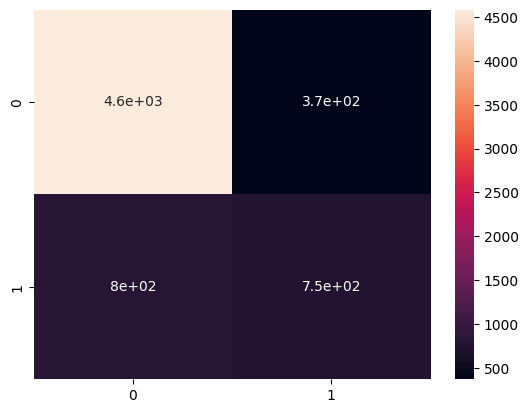

In [54]:
# 绘制混淆矩阵
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)#混淆矩阵:通过将预测结果与实际结果匹配的表格直观反映分类结果